In [10]:
import pandas as pd

METADATA = "../data/metadata.csv"
S2W = "../data/Screen2Words_tfidf.csv"


MOST_POPULAR_CATEGORIES = ["Education","Business","Entertainment","Music & Audio","Food & Drink","Shopping","Lifestyle","Books & Reference","Health & Fitness","Finance"]

In [11]:
#import metadata and s2w dataset with tfidf score

metadata = pd.read_csv(METADATA)
metadata.drop(columns=["Unnamed: 0"], inplace=True)
metadata.rename(columns={"UI Number": "screenId"}, inplace=True)

s2w = pd.read_csv(S2W)
s2w.drop(columns=["Unnamed: 0"], inplace=True)

In [12]:
#add tfidf score to s2w dataset

metadata_tfidf = pd.merge(metadata, s2w[["screenId","tfidf_grouped_sum"]].drop_duplicates(), on="screenId")
metadata_tfidf = metadata_tfidf[metadata_tfidf['Category'].isin(MOST_POPULAR_CATEGORIES)]

In [14]:
#function, where each 20 samples from a dataframe are selected

def sampling_data (df, sample_amount=20):
    df['strata'] = pd.qcut(df['tfidf_grouped_sum'], sample_amount, labels=False)
    df = df.groupby('strata').apply(lambda x: x.sample(n=1))
    df = df.reset_index(drop=True)
    df = df.drop(columns=["strata"])
    return df

In [15]:
#spliting the datasframe into a set of dataframes based on the App category

categories = {k: v for k, v in metadata_tfidf.groupby('Category')}

for key, df in categories.items():
    # Apply the function to each DataFrame
    categories[key] = sampling_data(df)

    # You can store the result or print it
    print(f"sample for {key}")


sample for Books & Reference
sample for Business
sample for Education
sample for Entertainment
sample for Finance
sample for Food & Drink
sample for Health & Fitness
sample for Lifestyle
sample for Music & Audio
sample for Shopping


In [16]:
combined_sample = pd.concat(categories.values(), ignore_index=True)
combined_sample

,App Package Name,Play Store Name,Category,Average Rating,Number of Ratings,Number of Downloads,Date Updated,screenId,Interaction Trace Number,UI Number in Trace,split,tfidf_grouped_sum
0,com.solvus_lab.android.BibleEN_kjv,Holy Bible (KJV),Books & Reference,4.4,18030,"1,000,000 - 5,000,000","October 20, 2016",71214,1,904,dev,8.168385
1,cherryapps.pokeguide,Poke Guide,Books & Reference,4.1,2880,"100,000 - 500,000","October 25, 2015",26804,0,314,train,8.674069
2,com.pleco.chinesesystem,Pleco Chinese Dictionary,Books & Reference,4.6,26679,"1,000,000 - 5,000,000","February 28, 2017",47519,0,2643,test,8.821207
3,com.supersimpleapps.readerapp,eBook Reader,Books & Reference,3.8,510,"100,000 - 500,000","December 14, 2016",64924,0,28,dev,8.984162
4,com.gty.macarthurstudybible,The Study Bible,Books & Reference,4.8,10480,"100,000 - 500,000","December 16, 2016",63037,0,621,test,9.026501
...,...,...,...,...,...,...,...,...,...,...,...,...
195,com.iherb,iHerb,Shopping,4.5,21220,"1,000,000 - 5,000,000","May 8, 2017",23206,0,92,train,10.367145
196,it.doveconviene.android,Shopfully - Weekly Ads & Deals,Shopping,4.4,243044,"10,000,000 - 50,000,000","December 7, 2016",12632,0,190,train,10.564256
197,com.zulily.android,zulily: Deals for Women & Kids,Shopping,4.5,26988,"1,000,000 - 5,000,000","May 10, 2017",5116,0,221,train,10.614379
198,com.heb.android,H-E-B,Shopping,4.0,4283,"500,000 - 1,000,000","November 7, 2016",45737,0,438,train,10.825190


In [17]:
combined_sample["Category"].value_counts()

Category
Books & Reference    20
Business             20
Education            20
Entertainment        20
Finance              20
Food & Drink         20
Health & Fitness     20
Lifestyle            20
Music & Audio        20
Shopping             20
Name: count, dtype: int64

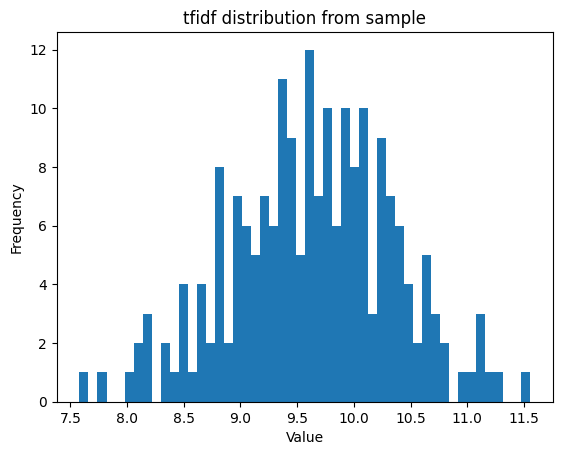

In [18]:
import matplotlib.pyplot as plt

data = combined_sample["tfidf_grouped_sum"]  # your large dataset
plt.hist(data, bins=50)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('tfidf distribution from sample')
plt.show()

In [22]:
combined_sample.sort_values(by="screenId", inplace=True)
combined_sample.to_csv("../data/s2w_sample.csv")